In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from math import sin, cos, radians, pi, atan2, degrees


In [2]:
angles_max_min = pd.read_csv('Outputs/output_hands_2/right_hands_angles_max_min.csv')

In [3]:
angles_max_min

,Unnamed: 0,thumb_1,thumb_2,thumb_3,index_finger_1,index_finger_2,index_finger_3,middle_finger_1,middle_finger_2,middle_finger_3,ring_finger_1,ring_finger_2,ring_finger_3,pinky_1,pinky_2,pinky_3
0,max_angles,"[46.522513347609866, 42.45446607019647]",[],[9.07300625450881],"[69.39135782798314, 78.01508614663025]","[69.68299328734915, 69.49617832208841]","[22.426859393207337, 30.249527952195276]","[68.55613247979576, 80.50629212149201]","[87.33309436022391, 75.45662481450277]","[21.52302046648305, 24.65341964398181]","[75.74890519048878, 78.93212788887718]","[87.287852072836, 78.58338528521536]","[29.50909988484655, 30.98490475529918]","[79.65988908837024, 75.90513091697777]","[56.25626676928215, 59.44809047485423]","[29.485577943779123, 30.889554528954168]"
1,min_angles,"[21.43411265694134, 33.62295836876474]",[17.901508356781466],"[6.56877949717074, 6.328607072535874]","[29.17258312163786, 16.548103677740745]","[2.2493848479183316, 3.6926805576001525]","[3.8411305295035127, 4.16219039156899]","[19.780629374531216, 5.260325942321671]","[7.247807225926096, 7.29482178647903]","[3.9995229209706884, 1.1271980853627375]","[14.382164798993145, 14.926876569908645]","[11.990802551896678, 12.008783579418072]","[6.636784004788858, 1.7558094045222343]","[23.129248779076168, 25.115999758251885]","[11.372221133002753, 12.21043769337573]","[7.4523158539115855, 7.662857608747281]"
2,max_times,[ 60 183],[],[114],[ 64 185],[ 86 185],[ 60 185],[ 88 185],[ 61 185],[ 63 185],[ 68 185],[ 61 185],[ 59 185],[ 84 185],[ 61 185],[ 61 185]
3,min_times,[ 24 114],[59],[ 57 185],[ 32 119],[ 32 120],[ 32 154],[ 32 116],[ 32 113],[ 32 154],[ 32 114],[ 32 113],[ 32 157],[ 29 113],[ 32 113],[ 32 113]


In [23]:
x1, y1 = [1,1]
x2, y2 = [1,2]
dot = x1*x2 + y1*y2      # dot product between [x1, y1] and [x2, y2]
det = x1*y2 - y1*x2      # determinant
angle = atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

In [24]:
degrees(angle)

18.43494882292201

In [18]:
def angle_to(p1, p2, rotation=0, clockwise=False):
    angle = degrees(atan2(p2[1] - p1[1], p2[0] - p1[0])) - rotation
    if not clockwise:
        angle = -angle
    return angle % 360

In [19]:
angle_to(p1=[1,2],p2=[1,1])

90.0

In [26]:
compute_angle(v1=[1,2,0],v2=[1,1,-1])

39.2

In [9]:
def compute_angle(v1, v2, acute=True):
    # v1 is your firsr vector
    # v2 is your second vector
    # actue= True means that all angles we compute are less than 180 degrees
    angle_ = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    if (acute == True):
        angle = angle_
    else:
        angle =  2 * np.pi - angle_
    return round((180 * angle/np.pi),1)

In [9]:
angles = pd.read_csv('Outputs/output_hands_2/right_hands_angles.csv')

In [24]:
def create_fingle_list():
    finger_list_point = np.array(['_1','_2','_3']*5)
    finger_list_type = np.array(['thumb']*3+['index_finger']*3+['middle_finger']*3+['ring_finger']*3+['pinky']*3)
    finger_list = []
    for i in range(finger_list_point.shape[0]):
      finger_list.append(finger_list_type[i]+finger_list_point[i])

    return finger_list

In [25]:
finger_list = create_fingle_list()

<Figure size 432x288 with 0 Axes>

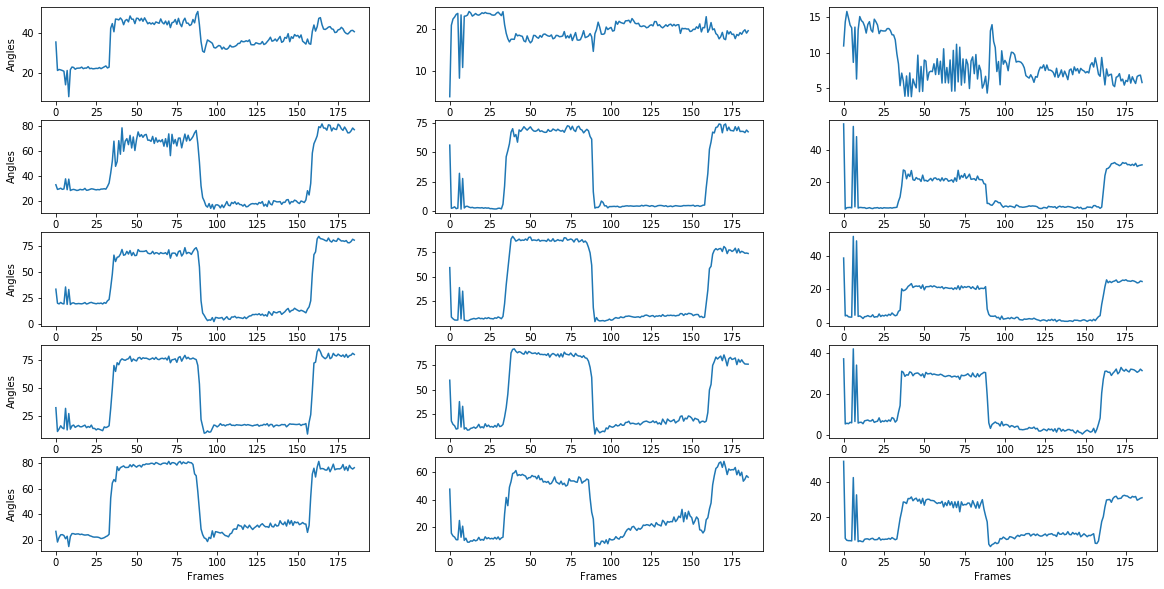

In [29]:

fig = plt.figure()
fig, axs = plt.subplots(5,3,figsize=(20,10))
for i, ax in enumerate(axs.flat):
    # print(i)
    ax.plot(angles.iloc[:,i+1].values)
    # ax.set_title(f'{finger_list[i]}')
plt.setp(axs[-1,:], xlabel='Frames')    
plt.setp(axs[:,0], ylabel='Angles')    

plt.show()

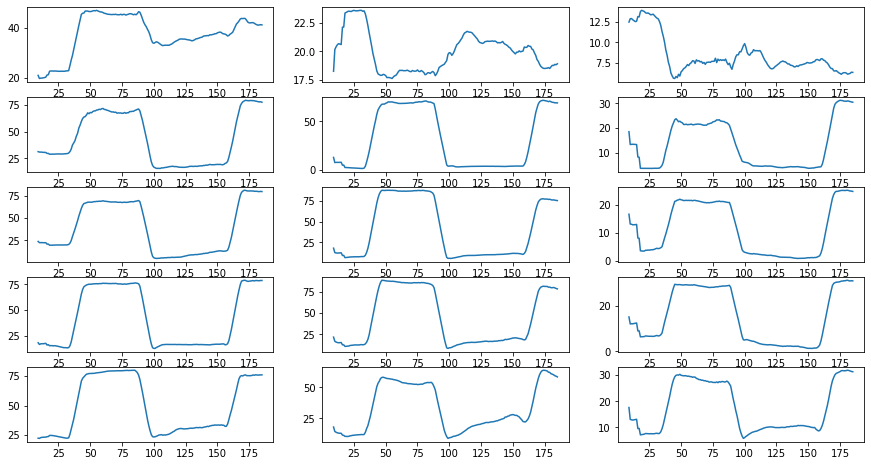

In [4]:
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(5,3,i)
    plt.plot(angles.iloc[:,i].rolling(10).mean())
plt.show()

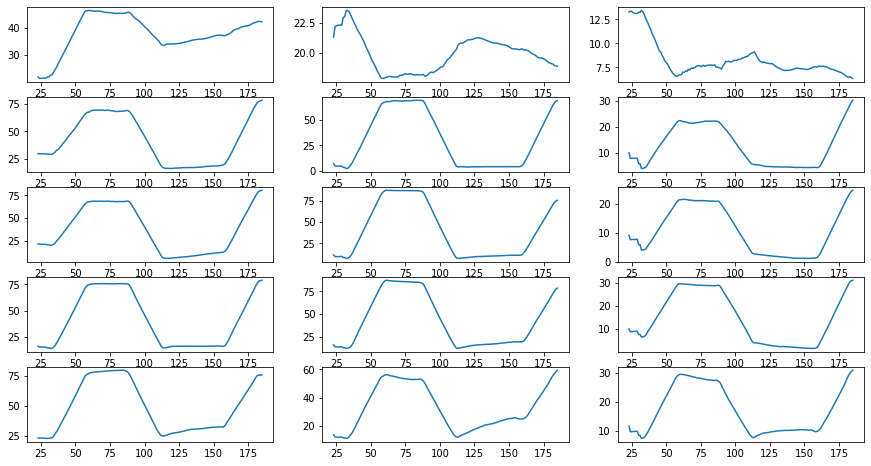

In [5]:
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(5,3,i)
    plt.plot(angles.iloc[:,i].rolling(24).mean())
plt.show()

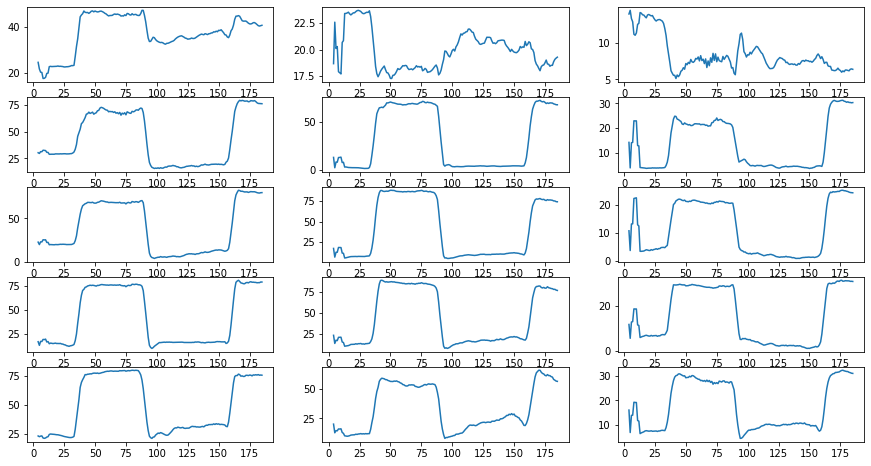

In [6]:
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(5,3,i)
    plt.plot(angles.iloc[:,i].rolling(5, win_type='gaussian').mean(std=angles.std().mean()))
plt.show()

In [7]:
from scipy import signal
def apply_convolution(sig, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(sig, conv, mode='same') / window
    return filtered

In [8]:
# df.apply(lambda srs: apply_convolution(srs, 100)).plot(figsize=(12, 8))
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(4,4,i)
    angles.apply(lambda srs: apply_convolution(srs, 100)).plot()
plt.show()